In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from itertools import combinations

In [7]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

In [8]:
from matplotlib import rcParams 
rcParams['pdf.fonttype'] = 42 # True font
rcParams['font.family'] =  "sans-serif" 
rcParams['font.sans-serif'] = "Liberation Sans"  # font Arial
rcParams['font.size'] =  8  
rcParams['grid.linewidth'] =  0.5 
rcParams['lines.color'] = 'b' 
rcParams['lines.linewidth'] = 1 
rcParams['lines.markersize'] = 3
rcParams['lines.markeredgewidth'] = 0 # set Marker with no edgelines
rcParams['axes.linewidth'] = 0.5
rcParams['axes.titlesize'] = 12
rcParams['axes.labelsize'] = 8
rcParams['xtick.labelsize'] = 8
rcParams['ytick.labelsize'] = 8
rcParams['legend.fontsize'] = 8
rcParams['legend.title_fontsize'] = 8

In [9]:
Datadir='/data2/linzhuobin/Hap3D_Figures/figure_processing_data'
fsnp_list=f'{Datadir}/Fig2/figure_processing_data/frag-snp.list'  ## 6bp snp filter
fmap_list=f'{Datadir}/Fig2/figure_processing_data/frag-map.list' ## mapping info by 
fhap_list=f'{Datadir}/Fig2/figure_processing_data/whatshap.list' ## whatshap raw
out_dir='/data2/linzhuobin/Hap3D_Figures/pdf'

In [10]:
fsnp=pd.read_csv(fsnp_list,header=None,sep='\t',names=['rid','fid','cid','pos','left','right','hp'])
fsnp['snp_type']=fsnp.apply(lambda x: min(x.left,x.right),axis=1)
fsnp

,rid,fid,cid,pos,left,right,hp,snp_type
0,7,1,0,195686365,5,5,2,5
1,7,1,0,195686610,5,5,2,5
2,7,2,0,195690595,5,5,2,5
3,7,2,0,195691614,5,5,2,5
4,7,2,0,195692832,5,5,2,5
...,...,...,...,...,...,...,...,...
5049999,20293668,0,0,38748480,5,0,1,0
5050000,20293668,0,0,38748546,5,3,1,3
5050001,20293668,0,0,38748568,5,5,1,5
5050002,20293668,3,0,38300111,5,5,1,5


In [11]:
fmap=pd.read_csv(fmap_list,header=None,sep='\t',names=['rid','fid','cid','pos','mapQ','PI','length'])
fmap

,rid,fid,cid,pos,mapQ,PI,length
0,7,0,0,195726263,60,86.2069,228
1,7,1,0,195686014,60,95.9635,756
2,7,2,0,195690478,60,96.0880,3630
3,26,0,0,212792414,30,91.3386,863
4,26,10,0,212612806,30,86.1702,91
...,...,...,...,...,...,...,...
8152226,20293668,1,0,38745389,60,89.6084,644
8152227,20293668,3,0,38299951,60,92.0570,480
8152228,20293668,4,0,38350664,60,95.6522,314
8152229,20293668,5,0,38296320,60,95.0192,770


In [12]:
fhap=pd.read_csv(fhap_list,header=None,sep='\t',names=['rid','fid','cid','pos','hp'])
fhap

,rid,fid,cid,pos,hp
0,7,0,0,195726263,0
1,7,1,0,195686014,2
2,7,2,0,195690478,2
3,26,0,0,212792414,2
4,26,10,0,212612806,0
...,...,...,...,...,...
8152226,20293668,1,0,38745389,0
8152227,20293668,3,0,38299951,1
8152228,20293668,4,0,38350664,0
8152229,20293668,5,0,38296320,1


In [13]:
### read-level phasing stats
df=fhap.groupby('rid')['hp'].apply(list).reset_index()
df['h1']=df.hp.apply(lambda x: x.count(1) if 1 in x else 0)
df['h2']=df.hp.apply(lambda x: x.count(2) if 2 in x else 0)
df['un']=df.hp.apply(lambda x: x.count(0) if 0 in x else 0)
df['hp']=df['h1']+df['h2']
df['fc']=df['hp']+df['un']
df['mod_fc']=df.fc.apply(lambda x: x if x<=10 else 10)
df['ratio']=df.apply(lambda x: round(x.hp/x.fc*100,2),axis=1)
df.head()

,rid,hp,h1,h2,un,fc,mod_fc,ratio
0,7,2,0,2,1,3,3,66.67
1,26,6,0,6,5,11,10,54.55
2,32,0,0,0,1,1,1,0.00
3,46,0,0,0,2,2,2,0.00
4,68,1,0,1,5,6,6,16.67


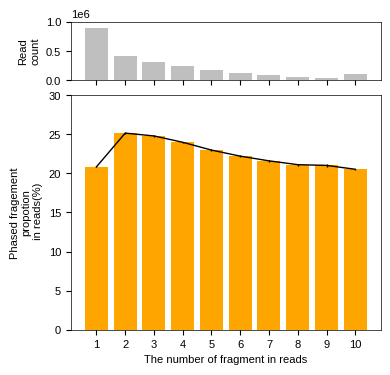

In [14]:
## Fig. 2C: Ratio of phased fragments
### read-level phasing stats
from scipy import stats
plotdf =  pd.DataFrame({
    'Fragment_count': df.mod_fc.values,
    'Phased_Frag_propotion': df.ratio.values})
#print(plotdf)
# Calculate means and standard deviations
grouped = plotdf.groupby('Fragment_count')['Phased_Frag_propotion']
means = grouped.mean()
stds = grouped.std()
sems = grouped.apply(stats.sem)
lower = grouped.apply(lambda x: stats.t.interval(0.95, len(x) -1, loc=np.mean(x), scale=stats.sem(x) )[0] )
CIs = means - lower
#print(sems, CIs)

# Calculate counts
counts = grouped.count()
# Create a new figure with subplots
fig, axs = plt.subplots(2, 1, figsize=(4, 4), sharex=True, gridspec_kw={'height_ratios': [1, 4]})
fig.subplots_adjust(hspace=0.1)  # Reduce space between plots

# Plot counts as a bar plot on the top subplot
axs[0].bar(range(len(counts) ), counts, color='grey', alpha=0.5)
axs[0].set_ylabel('Read\ncount')
axs[0].set_ylim([0, 1000000])

# Plot means
axs[1].bar(range(len(means)), means.values, yerr=CIs, capsize=5, color='orange')
axs[1].plot(range(len(means)), means.values, "-",color='k')
# # Fill the area between mean + std and mean - std
# axs[1].fill_between(range(len(means)), means - stds, means + stds, color='blue', alpha=0.2)
axs[1].set_ylim([0, 30])
axs[1].set_ylabel('Phased fragement\npropotion\n in reads(%)')


plt.xticks(range(0,10), means.index)  # Set x-ticks to be group names
#plt.title('Mean ± std value curve for each group with counts')
plt.xlabel("The number of fragment in reads")
#plt.show()
fig=out_dir+'/Ratio_of_phased_fragments_0629.pdf'
plt.savefig(fig,dpi=300,bbox_inches = 'tight')

In [15]:
counts

Fragment_count
1     887663
2     415078
3     307709
4     239086
5     181218
6     132549
7      93199
8      64600
9      44082
10    101617
Name: Phased_Frag_propotion, dtype: int64

In [10]:
## Fig. 2C: Number of SNPs in fragments
### integrate SNPs number, fragment length and whatshap hp
df=fsnp.groupby(['rid','fid'])['hp'].count().reset_index()
df.columns=['rid','fid','snp_num']
df=pd.merge(fmap,df,how='left')
df=pd.merge(fhap,df)
df['snp_num']=df['snp_num'].fillna(0).astype(int)
len_group=[0,400,800,1200,1600,2000,df.length.max()]
len_label=['0-400','400-800','800-1200','1200-1600','1600-2000','>2000']
df['mod_length']=pd.cut(df.length,len_group,labels=len_label)
df

,rid,fid,cid,pos,hp,mapQ,PI,length,snp_num,mod_length
0,7,0,0,195726263,0,60,86.2069,228,0,0-400
1,7,1,0,195686014,2,60,95.9635,756,2,400-800
2,7,2,0,195690478,2,60,96.0880,3630,4,>2000
3,26,0,0,212792414,2,30,91.3386,863,1,800-1200
4,26,10,0,212612806,0,30,86.1702,91,0,0-400
...,...,...,...,...,...,...,...,...,...,...
8152226,20293668,1,0,38745389,0,60,89.6084,644,0,400-800
8152227,20293668,3,0,38299951,1,60,92.0570,480,1,400-800
8152228,20293668,4,0,38350664,0,60,95.6522,314,0,0-400
8152229,20293668,5,0,38296320,1,60,95.0192,770,1,400-800


In [11]:
from scipy import stats
group_num = df.groupby('mod_length')["length"].count()
group_snps_mean = df.groupby('mod_length')['snp_num'].mean()
group_snps_sem = df.groupby('mod_length')['snp_num'].apply(stats.sem)
lower = df.groupby('mod_length')['snp_num'].apply(lambda x: stats.t.interval(0.95, len(x) -1, loc=np.mean(x), scale=stats.sem(x) )[0] )
CIs = group_snps_mean - lower
print(group_snps_mean, group_snps_sem, CIs)

### ratio of phased fragments and snp number
phase_ratio={}
for l in len_label:
    ldf=df.loc[df.mod_length==l,]
    unr=sum(ldf.snp_num==0)/len(ldf)*100
    r=100-unr
    phase_ratio[l] = r
phase_ratio = pd.Series(phase_ratio)
plot_df = pd.DataFrame({"Frag_len": len_label,
                        "Frag_count": group_num,
                        "snp_mean":group_snps_mean,
                        "snp_sem":group_snps_sem,
                        "snp_CIs":CIs,
                        "phased_ratio":phase_ratio})
plot_df

mod_length
0-400        0.136495
400-800      0.357550
800-1200     0.617036
1200-1600    0.888237
1600-2000    1.169916
>2000        2.258639
Name: snp_num, dtype: float64 mod_length
0-400        0.000287
400-800      0.000592
800-1200     0.001186
1200-1600    0.001999
1600-2000    0.003120
>2000        0.004219
Name: snp_num, dtype: float64 mod_length
0-400        0.000563
400-800      0.001161
800-1200     0.002324
1200-1600    0.003918
1600-2000    0.006115
>2000        0.008268
Name: snp_num, dtype: float64


,Frag_len,Frag_count,snp_mean,snp_sem,snp_CIs,phased_ratio
0-400,0-400,2739076,0.136495,0.000287,0.000563,10.618070
400-800,400-800,2110013,0.357550,0.000592,0.001161,22.323938
800-1200,800-1200,1224182,0.617036,0.001186,0.002324,31.127234
1200-1600,1200-1600,746596,0.888237,0.001999,0.003918,37.692005
1600-2000,1600-2000,464901,1.169916,0.003120,0.006115,42.724795
>2000,>2000,867463,2.258639,0.004219,0.008268,52.155423


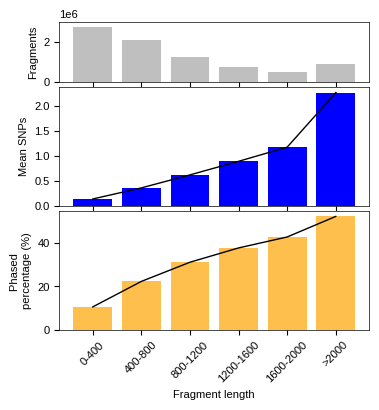

In [12]:
# Fig. 2C: Number of SNPs in fragments and Phased fragment percentage
# Create a new figure 
fig, axs = plt.subplots(3, 1, figsize=(4, 4), sharex=True, gridspec_kw={'height_ratios': [1, 2, 2]})
fig.subplots_adjust(hspace=0.05)  # Reduce space between plots

# Plot counts as a bar plot on the top subplot
axs[0].bar( range(0, len(plot_df)) , plot_df.Frag_count, color='grey', alpha=0.5)
axs[0].set_ylabel('Fragments')
axs[0].set_ylim([0, 3000000])

# Plot SNP means±sem bar plot
axs[1].plot( range(0, len(plot_df)) , plot_df.snp_mean.values, "-" , color="k")
axs[1].bar( range(0, len(plot_df)) , plot_df.snp_mean.values,  color="blue", 
           yerr=plot_df.snp_CIs.values, capsize=5 )
axs[1].set_ylabel('Mean SNPs')

# Plot Phase percentage bar plot
axs[2].plot( range(0, len(plot_df)) , plot_df.phased_ratio.values, "-" , color="k")
axs[2].bar( range(0, len(plot_df)) , plot_df.phased_ratio.values,  color='orange', alpha=0.7 )
axs[2].set_ylabel('Phased \npercentage (%)')

plt.xticks(range(0, len(plot_df)), plot_df.index, rotation=45)  # Set x-ticks to be group names
#plt.title('Mean ± std value curve for each group with counts')
plt.xlabel("Fragment length")
#plt.show()
fig=out_dir+'/Number_of_SNPs_in_fragments_0629.pdf'
plt.savefig(fig,dpi=300,bbox_inches = 'tight')

In [13]:
## Fig. 2F: SNP match base filter
def add_flatten_lists(the_lists):
    result = []
    for _list in the_lists:
        result += _list
    return result

def assign_frag_hp(hp_list):
    hp1,hp2=hp_list.count(1),hp_list.count(2)
    if hp1==len(hp_list):
        hp=1
    elif hp2==len(hp_list):
        hp=2
    else:
        hpr=hp1/hp2
        hp=1 if hpr>=2 else 2 if hpr<=0.5 else 0
    return hp

def filter_snp_type(fmap,fsnp):
    snp_type=[0,1,2,3,4,5]
    for i in snp_type:
        filter_base=str(i)+'bp'
        filter_fsnp=fsnp.loc[fsnp.snp_type>=i]
        sdf=filter_fsnp.groupby(['rid','fid'])['hp'].apply(list).reset_index()
        sdf[filter_base]=sdf.apply(lambda x: assign_frag_hp(x.hp),axis=1)
        sdf=sdf[['rid','fid',filter_base]]
        fmap=pd.merge(fmap,sdf,how='left')
    fmap=fmap.fillna(0).astype(int)
    return fmap

def match_base_filter(fmap):
    rlist=[]
    snp_type=[0,1,2,3,4,5]
    for i in snp_type:
        filter_base=str(i)+'bp'
        filter_fmap=fmap[['rid','fid','cid','pos','mapQ','PI','length',filter_base]]
        filter_fmap=filter_fmap.rename(columns={filter_base:'hp'})
        ratio=sum(filter_fmap.hp!=0)/len(filter_fmap)*100
        #count = len(filter_fmap) # number of match fragments
        
        df=filter_fmap.copy()
        df=df.loc[df.hp!=0]
        df=df.groupby('rid')['hp'].apply(list).reset_index()
        df['ihp']=df.hp.apply(lambda x: [i[0]+i[1] for i in list(combinations(x,2))])
        ihp=add_flatten_lists(df.ihp)
        hratio=ihp.count(3)/len(ihp)*100
        rlist.append([i, ratio,hratio])
    base_df=pd.DataFrame(rlist)
    base_df.columns=['snp_type','phased_ratio','htrans_ratio']
    return base_df

In [14]:
## Fig. 2F: SNP match base filter
### integrate filter result
fmap=filter_snp_type(fmap,fsnp)
base_df=match_base_filter(fmap)
fmap

,rid,fid,cid,pos,mapQ,PI,length,0bp,1bp,2bp,3bp,4bp,5bp
0,7,0,0,195726263,60,86,228,0,0,0,0,0,0
1,7,1,0,195686014,60,95,756,2,2,2,2,2,2
2,7,2,0,195690478,60,96,3630,2,2,2,2,2,2
3,26,0,0,212792414,30,91,863,2,2,2,2,2,2
4,26,10,0,212612806,30,86,91,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8152226,20293668,1,0,38745389,60,89,644,0,0,0,0,0,0
8152227,20293668,3,0,38299951,60,92,480,1,1,1,1,1,1
8152228,20293668,4,0,38350664,60,95,314,0,0,0,0,0,0
8152229,20293668,5,0,38296320,60,95,770,1,1,1,1,1,1


In [15]:
base_df["Phase_loss"] = -1* ( base_df.phased_ratio.values - base_df.phased_ratio.values[0] )
base_df

,snp_type,phased_ratio,htrans_ratio,Phase_loss
0,0,24.492363,10.064144,-0.000000
1,1,23.985913,8.630819,0.506450
2,2,23.586783,8.008500,0.905580
3,3,23.235578,7.777618,1.256785
4,4,22.852297,7.595043,1.640066
5,5,22.487255,7.484417,2.005108


In [16]:
def smoothline(rawx, rawy, method="linear"):
    # Create a function which interpolates y values
    f = interp1d(rawx, rawy, kind=method)
    # Create an array of x values for the smooth line
    xnew = np.linspace(rawx.min(), rawx.max(), 500)
    # Create the smooth line
    ynew = f(xnew)
    return(xnew, ynew)

def Fittingcurve(rawx, rawy):
    #  fitting a 2nd degree polynomial curve
    coeffs = np.polyfit(rawx, rawy, 3)
    poly_func = np.poly1d(coeffs)
    xnew = np.linspace(rawx.min(), rawx.max(), 500)
    ynew = poly_func(xnew)
    return(xnew, ynew)


def polyfit_with_confidence_interval(rawx, rawy, degree=2, ci=0.95):
    # Fit the polynomial
    coeffs = np.polyfit(rawx, rawy, degree)
    # Generate a bunch of x values in the range of the actual x values
    xnew = np.linspace(np.min(rawx), np.max(rawx), 1000)

    # Use the coefficients to evaluate the polynomial at the xnew values
    ynew = np.polyval(coeffs, xnew)

    # Calculate the y residuals
    y_res = rawy - np.polyval(coeffs, rawx)

    # Calculate the standard deviation of the residuals
    res_std = np.sqrt(sum(y_res**2) / (len(rawy) - degree - 1))

    # Use the standard deviation to calculate the confidence interval
    ci = stats.t.ppf((1 + ci) / 2, len(rawx) - degree - 1)
    y_ci = ci * res_std * np.sqrt(1/len(rawx) + (xnew - np.mean(rawx))**2 / np.sum((rawx - np.mean(rawx))**2))

    return (xnew, ynew, y_ci)
    

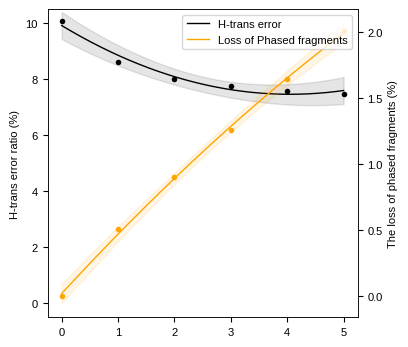

In [17]:
### bar and line plot
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)

xval, yval = base_df.snp_type,base_df.htrans_ratio
ax1.plot(xval, yval, 'o',color='k', markersize=4)
#xnew, ynew = Fittingcurve(xval, yval)
#xnew, ynew = smoothline(xval, yval, 'quadratic' ) # smooth x, y
xnew, ynew, y_ci= polyfit_with_confidence_interval(xval, yval)
ax1.fill_between(xnew, (ynew-y_ci), (ynew+y_ci), color='k', alpha=.1)
ax1.plot(xnew, ynew, 'k-', label="H-trans error", linewidth=1) # smooth line
ax1.set_ylabel('H-trans error ratio (%)')
ax1.set_ylim(-0.5,10.5)

ax2 = ax1.twinx()
xval, yval = base_df.snp_type.values, base_df.Phase_loss.values
#ax2.bar(base_df.snp_type,base_df.Phase_loss,width=0.5, color="orange")
ax2.plot(xval, yval,"o", color="orange",  markersize=4)
#xnew, ynew = Fittingcurve(xval, yval)
#xnew, ynew = smoothline(base_df.snp_type.values, base_df.Phase_loss.values,  'quadratic') # smooth x, y
xnew, ynew, y_ci= polyfit_with_confidence_interval(xval, yval)
ax2.fill_between(xnew, (ynew-y_ci), (ynew+y_ci), color='orange', alpha=.1)
ax2.plot(xnew, ynew, '-', color="orange", label="Loss of Phased fragments",  linewidth=1) # smooth line

ax2.set_ylabel('The loss of phased fragments (%)')
#ax2.set_xticks(xval,xval)
ax2.set_xlabel("Match base filter (bp)")#,fontsize=12
#ax1.set_ylim(0,26)
fig.legend( bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

fig=out_dir+'/Match_base_filter_0629.pdf'
plt.savefig(fig,dpi=300,bbox_inches = 'tight')

In [18]:
## Fig. 2G: mapQ filter
def mapQ_filter(fmap):
    rlist=[]
    mapQ_list=[0,1,2,5,10,20,30,40,50,60]
    for i in mapQ_list:
        filter_fmap=fmap.rename(columns={'0bp':'hp'})
        filter_mapQ=(filter_fmap.mapQ>=i) & (filter_fmap.hp!=0)
        ratio=sum(filter_mapQ)/len(filter_fmap)*100
        
        df=filter_fmap.loc[filter_mapQ]
        df=df.groupby('rid')['hp'].apply(list).reset_index()
        df['ihp']=df.hp.apply(lambda x: [i[0]+i[1] for i in list(combinations(x,2))])
        ihp=add_flatten_lists(df.ihp)
        hratio=ihp.count(3)/len(ihp)*100
        rlist.append([i,ratio,hratio])
    mapQ_df=pd.DataFrame(rlist)
    mapQ_df.columns=['snp_type','phased_ratio','htrans_ratio']
    return mapQ_df

### integrate filter result
mapQ_df=mapQ_filter(fmap)
mapQ_df["Phase_loss"] = -1* ( mapQ_df.phased_ratio.values - mapQ_df.phased_ratio.values[0] )
mapQ_df

,snp_type,phased_ratio,htrans_ratio,Phase_loss
0,0,24.492363,10.064144,-0.000000
1,1,24.422652,9.915966,0.069711
2,2,23.686044,9.008720,0.806319
3,5,23.353840,8.687854,1.138523
4,10,22.969602,8.623464,1.522761
5,20,22.489390,8.396333,2.002973
6,30,22.489390,8.396333,2.002973
7,40,12.464404,7.214136,12.027959
8,50,12.464404,7.214136,12.027959
9,60,9.447254,6.246292,15.045109


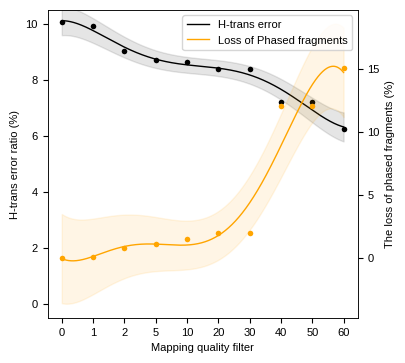

In [19]:
### bar and line plot
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)
xval, yval = mapQ_df.index.values, mapQ_df.htrans_ratio.values

ax1.plot(xval, yval , 'o',color='k', markersize=4)
#xnew, ynew = smoothline(xval, yval , 'cubic' ) # smooth x, y
#xnew, ynew = Fittingcurve(xval, yval)
xnew, ynew, y_ci= polyfit_with_confidence_interval(xval, yval,5)
ax1.fill_between(xnew, (ynew-y_ci), (ynew+y_ci), color='k', alpha=.1)
ax1.plot(xnew, ynew, 'k-', label="H-trans error", linewidth=1) # smooth line
ax1.set_ylabel('H-trans error ratio (%)')
ax1.set_ylim(-0.5,10.5)

xval, yval = mapQ_df.index.values, mapQ_df.Phase_loss.values
ax2 = ax1.twinx()

ax2.plot(xval, yval ,"o", color="orange",  markersize=4)
#xnew, ynew = smoothline(xval, yval,  'cubic') # smooth x, y
#xnew, ynew = Fittingcurve(xval, yval)
xnew, ynew, y_ci= polyfit_with_confidence_interval(xval, yval,5)
ax2.fill_between(xnew, (ynew-y_ci), (ynew+y_ci), color='orange', alpha=.1)
ax2.plot(xnew, ynew, '-', color="orange", label="Loss of Phased fragments",  linewidth=1) # smooth line

ax2.set_ylabel('The loss of phased fragments (%)')
#ax2.set_xticks(list(xval), list(mapQ_df.snp_type.values) )
ax1.set_xlabel("Mapping quality filter")#,fontsize=12
#ax1.set_ylim(0,26)
plt.xticks(list(xval), list(mapQ_df.snp_type.values), rotation=0) 
fig.legend( bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

fig=out_dir+'/Mapping_quality_filter_0629.pdf'
plt.savefig(fig,dpi=300,bbox_inches = 'tight')

In [20]:
## Fig. 2H: PI filter
### integrate filter result
#PI_df=PI_filter(fmap)
def PI_filter(fmap):
    rlist=[]
    PI_list=[0,20,40,60,80,85,90,95]#100
    for i in PI_list:
        filter_fmap=fmap.rename(columns={'0bp':'hp'})
        filter_PI=(filter_fmap.PI>=i) & (filter_fmap.hp!=0)
        ratio=sum(filter_PI)/len(filter_fmap)*100
        
        df=filter_fmap.loc[filter_PI]
        df=df.groupby('rid')['hp'].apply(list).reset_index()
        df['ihp']=df.hp.apply(lambda x: [i[0]+i[1] for i in list(combinations(x,2))])
        ihp=add_flatten_lists(df.ihp)
        hratio=ihp.count(3)/len(ihp)*100
        rlist.append([i,ratio,hratio])
    PI_df=pd.DataFrame(rlist)
    PI_df.columns=['Indentity','phased_ratio','htrans_ratio']
    return PI_df

In [21]:
PI_df=PI_filter(fmap)
PI_df["Phase_loss"] = -1* ( PI_df.phased_ratio.values - PI_df.phased_ratio.values[0] )
PI_df

,Indentity,phased_ratio,htrans_ratio,Phase_loss
0,0,24.492363,10.064144,-0.000000
1,20,24.492338,10.064159,0.000025
2,40,24.491995,10.063420,0.000368
3,60,24.479311,10.046317,0.013052
4,80,23.691048,9.474047,0.801314
5,85,22.268628,8.845531,2.223735
6,90,18.715453,7.849990,5.776909
7,95,8.382098,6.120647,16.110265


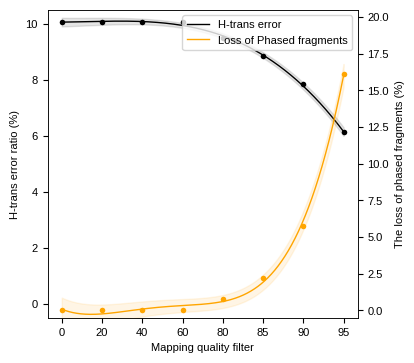

In [22]:
### bar and line plot
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)
xval, yval = PI_df.index.values, PI_df.htrans_ratio.values

ax1.plot(xval, yval , 'o',color='k', markersize=4)
#xnew, ynew = smoothline(xval, yval , 'cubic' ) # smooth x, y
#xnew, ynew = Fittingcurve(xval, yval)
xnew, ynew, y_ci= polyfit_with_confidence_interval(xval, yval,3)
ax1.fill_between(xnew, (ynew-y_ci), (ynew+y_ci), color='k', alpha=.1)
ax1.plot(xnew, ynew, 'k-', label="H-trans error", linewidth=1) # smooth line
ax1.set_ylabel('H-trans error ratio (%)')
ax1.set_ylim(-0.5,10.5)

xval, yval = PI_df.index.values, PI_df.Phase_loss.values
ax2 = ax1.twinx()

ax2.plot(xval, yval ,"o", color="orange",  markersize=4)
#xnew, ynew = smoothline(xval, yval,  'cubic') # smooth x, y
#xnew, ynew = Fittingcurve(xval, yval)
xnew, ynew, y_ci= polyfit_with_confidence_interval(xval, yval,4)
ax2.fill_between(xnew, (ynew-y_ci), (ynew+y_ci), color='orange', alpha=.1)
ax2.set_ylim(-0.5,20.5)
ax2.plot(xnew, ynew, '-', color="orange", label="Loss of Phased fragments",  linewidth=1) # smooth line

ax2.set_ylabel('The loss of phased fragments (%)')
#ax2.set_xticks(xval, PI_df.snp_type, rotation=0)
ax1.set_xlabel("Mapping quality filter")#,fontsize=12
#ax1.set_ylim(0,26)
plt.xticks(xval, PI_df.Indentity, rotation=0)
fig.legend( bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

fig=out_dir+'/Mapping_identity_filter_0629.pdf'
plt.savefig(fig,dpi=300,bbox_inches = 'tight')

In [23]:
PI_df

,Indentity,phased_ratio,htrans_ratio,Phase_loss
0,0,24.492363,10.064144,-0.000000
1,20,24.492338,10.064159,0.000025
2,40,24.491995,10.063420,0.000368
3,60,24.479311,10.046317,0.013052
4,80,23.691048,9.474047,0.801314
5,85,22.268628,8.845531,2.223735
6,90,18.715453,7.849990,5.776909
7,95,8.382098,6.120647,16.110265


In [24]:
fmap

,rid,fid,cid,pos,mapQ,PI,length,0bp,1bp,2bp,3bp,4bp,5bp
0,7,0,0,195726263,60,86,228,0,0,0,0,0,0
1,7,1,0,195686014,60,95,756,2,2,2,2,2,2
2,7,2,0,195690478,60,96,3630,2,2,2,2,2,2
3,26,0,0,212792414,30,91,863,2,2,2,2,2,2
4,26,10,0,212612806,30,86,91,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8152226,20293668,1,0,38745389,60,89,644,0,0,0,0,0,0
8152227,20293668,3,0,38299951,60,92,480,1,1,1,1,1,1
8152228,20293668,4,0,38350664,60,95,314,0,0,0,0,0,0
8152229,20293668,5,0,38296320,60,95,770,1,1,1,1,1,1


In [25]:
def IntegratedStrategy(fmap, mapQ_thred=5, Ident_thred=85,filter_base='3bp'):
    
    def Hratio(filter_fmap, filterP):
        df=filter_fmap.loc[filterP]
        df=df.groupby('rid')['hp'].apply(list).reset_index()
        df['ihp']=df.hp.apply(lambda x: [i[0]+i[1] for i in list(combinations(x,2))])
        ihp=add_flatten_lists(df.ihp)
        hratio=ihp.count(3)/len(ihp)*100
        return(hratio)
     
    rlist=[]
    # Step0: no filter
    filter_fmap=fmap.rename(columns={"0bp":'hp'})
    filterP = filter_fmap.hp!=0
    ratio=sum(filterP)/len(filter_fmap)*100
    hratio = Hratio(filter_fmap, filterP)
    rlist.append(["No_Filter",ratio,hratio])
    
    # step1: mapq filter
    filterP=(filter_fmap.mapQ>=mapQ_thred) & (filter_fmap.hp!=0)
    ratio=sum(filterP)/len(filter_fmap)*100
    hratio = Hratio(filter_fmap, filterP)
    rlist.append(["Step1",ratio,hratio])
    
    # step2: mapq filter + Identity filter
    filterP=(filter_fmap.mapQ>=mapQ_thred) & (filter_fmap.PI>=Ident_thred) & (filter_fmap.hp!=0)
    ratio=sum(filterP)/len(filter_fmap)*100
    hratio = Hratio(filter_fmap, filterP)
    rlist.append(["Step2",ratio,hratio])
    
    # step3: mapq filter + Identity filter + base filter
    filter_fmap=fmap.rename(columns={filter_base:'hp'})
    filterP=(filter_fmap.mapQ>=mapQ_thred) & (filter_fmap.PI>=Ident_thred) & (filter_fmap.hp!=0)
    ratio=sum(filterP)/len(filter_fmap)*100
    hratio = Hratio(filter_fmap, filterP)
    rlist.append(["Step3",ratio,hratio])
    
    Int_df = pd.DataFrame(rlist)
    Int_df.columns=['Step','phased_ratio','htrans_ratio']
    return(Int_df)

Int_df=IntegratedStrategy(fmap)
Int_df["Phase_loss"] = -1* ( Int_df.phased_ratio.values - Int_df.phased_ratio.values[0] )
Int_df   

,Step,phased_ratio,htrans_ratio,Phase_loss
0,No_Filter,24.492363,10.064144,-0.000000
1,Step1,23.353840,8.687854,1.138523
2,Step2,21.318741,7.569029,3.173622
3,Step3,20.392001,5.596900,4.100362


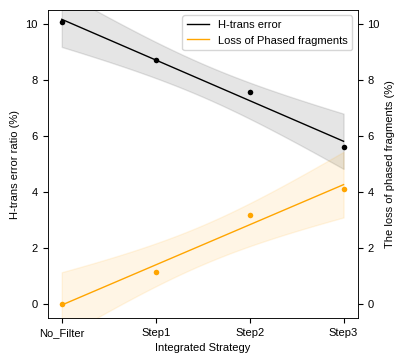

In [26]:
### bar and line plot
fig = plt.figure(figsize=(4,4))
ax1 = fig.add_subplot(111)
xval, yval = Int_df.index.values, Int_df.htrans_ratio.values

ax1.plot(xval, yval , 'o',color='k', markersize=4)
#xnew, ynew = smoothline(xval, yval , 'cubic' ) # smooth x, y
#xnew, ynew = Fittingcurve(xval, yval)
xnew, ynew, y_ci= polyfit_with_confidence_interval(xval, yval,1)
ax1.fill_between(xnew, (ynew-y_ci), (ynew+y_ci), color='k', alpha=.1)
ax1.plot(xnew, ynew, 'k-', label="H-trans error", linewidth=1) # smooth line
ax1.set_ylabel('H-trans error ratio (%)')
ax1.set_ylim(-0.5,10.5)

xval, yval = Int_df.index.values, Int_df.Phase_loss.values
ax2 = ax1.twinx()

ax2.plot(xval, yval ,"o", color="orange",  markersize=4)
#xnew, ynew = smoothline(xval, yval,  'cubic') # smooth x, y
#xnew, ynew = Fittingcurve(xval, yval)
xnew, ynew, y_ci= polyfit_with_confidence_interval(xval, yval,1)
ax2.fill_between(xnew, (ynew-y_ci), (ynew+y_ci), color='orange', alpha=.1)
ax2.plot(xnew, ynew, '-', color="orange", label="Loss of Phased fragments",  linewidth=1) # smooth line

ax2.set_ylabel('The loss of phased fragments (%)')
#ax2.set_xticks(xval, Int_df.Step, rotation=0)
ax1.set_xlabel("Integrated Strategy")#,fontsize=12
ax2.set_ylim(-0.5,10.5)
#ax1.set_ylim(0,26)
plt.xticks(xval, Int_df.Step, rotation=0)
fig.legend( bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

fig=out_dir+'/Total_filter_0629_mapq30.pdf'
plt.savefig(fig,dpi=300,bbox_inches = 'tight')

In [27]:
from itertools import combinations

import statsmodels.api as sm
lowess = sm.nonparametric.lowess

def add_flatten_lists(the_lists):
    result = []
    for _list in the_lists:
        result += _list
    return result

def stats_Hap(df):
    df=df.loc[df.hp!=0,]
    df=df.sort_values(['rid','pos']).reset_index(drop=True)
    statsdf=df.groupby('rid')['pos'].apply(list).reset_index()
    statsdf['hp']=df.groupby('rid')['hp'].apply(list).reset_index()['hp']
    statsdf['fnum']=statsdf['pos'].apply(lambda x: len(x))
    statsdf=statsdf.loc[statsdf.fnum>1,]

    statsdf['isize']=statsdf.pos.apply(lambda x: [abs(i[0]-i[1]) for i in list(combinations(x,2))])
    statsdf['ihp']=statsdf.hp.apply(lambda x: [i[0]+i[1] for i in list(combinations(x,2))])
    statsdf['ihp']=statsdf.ihp.apply(lambda x: ['h' if i==3 else 'c' for i in x])

    statsdf['fid']=df.groupby('rid')['fid'].apply(list).reset_index()['fid']
    statsdf['adj']=statsdf.fid.apply(lambda x: ['a' if abs(i[0]-i[1])==1 else 'u' for i in list(combinations(x,2)) ])
    
    isize=add_flatten_lists(statsdf.isize)
    ihp=add_flatten_lists(statsdf.ihp)
    adj=add_flatten_lists(statsdf.adj)

    sdf=pd.DataFrame({'isize':isize,'ihp':ihp,'adj':adj})
    return sdf

def cal_htrans(sdf,min_freq=10,binsize=10**5):
    sdf['bin_isize']=sdf.isize.apply(lambda x: round(x/binsize)*binsize)
    sdf=sdf.groupby(['bin_isize','ihp'])['adj'].count().reset_index()
    sdf.columns=['bin_isize','interaction','freq']
    sdf=sdf.sort_values(['bin_isize','interaction']).reset_index(drop=True)

    hdf=sdf.groupby('bin_isize')['interaction'].apply(list).reset_index()
    hdf['freq']=sdf.groupby('bin_isize')['freq'].apply(list).reset_index()['freq']
    hdf['total_freq']=hdf.freq.apply(lambda x: sum(x))
    hdf=hdf.loc[hdf.total_freq>=min_freq,]
    hdf['itype']=hdf.interaction.apply(lambda x: 'b' if len(x)==2 else x[0])
    hdf['hratio']=hdf.apply(lambda x: x.freq[1]/(x.total_freq)*100 if x.itype=='b' else 0 if x.itype=='c' else 100,axis=1)
    return hdf

def cal_lowess(sdf,plotx=10**6,lowess_frac=0.05):
    hdf=cal_htrans(sdf)
    hdf=pd.DataFrame({'bin_isize':hdf.bin_isize/plotx,'hratio':hdf.hratio})
    
    ahdf=cal_htrans(sdf.loc[sdf.adj=='a',]) #   adjacent
    ahdf=pd.DataFrame({'bin_isize':ahdf.bin_isize/plotx,'hratio':ahdf.hratio})
    uhdf=cal_htrans(sdf.loc[sdf.adj=='u',]) # unadjacent
    uhdf=pd.DataFrame({'bin_isize':uhdf.bin_isize/plotx,'hratio':uhdf.hratio})
    
    hdf['lowess_hratio'] = lowess(hdf['hratio'],hdf['bin_isize'],frac=lowess_frac)[:,1]
    ahdf['lowess_hratio'] = lowess(ahdf['hratio'],ahdf['bin_isize'],frac=lowess_frac)[:,1]
    uhdf['lowess_hratio'] = lowess(uhdf['hratio'],uhdf['bin_isize'],frac=lowess_frac)[:,1]
    
    return hdf,ahdf,uhdf

In [28]:
def cal_htrans_hic(sdf,min_freq=10,binsize=10**5):
    sdf['bin_isize']=sdf.isize.apply(lambda x: round(x/binsize)*binsize)
    sdf=sdf.groupby(['bin_isize','ihp'])['ptype'].count().reset_index()
    sdf.columns=['bin_isize','interaction','freq']
    sdf=sdf.sort_values(['bin_isize','interaction']).reset_index(drop=True)

    hdf=sdf.groupby('bin_isize')['interaction'].apply(list).reset_index()
    hdf['freq']=sdf.groupby('bin_isize')['freq'].apply(list).reset_index()['freq']
    hdf['total_freq']=hdf.freq.apply(lambda x: sum(x))
    hdf=hdf.loc[hdf.total_freq>=min_freq,]
    hdf['itype']=hdf.interaction.apply(lambda x: 'b' if len(x)==2 else x[0])
    hdf['hratio']=hdf.apply(lambda x: x.freq[1]/(x.total_freq)*100 if x.itype=='b' else 0 if x.itype=='c' else 100,axis=1)
    return hdf

def cal_lowess_hic(sdf,plotx=10**6,lowess_frac=0.05):
    phdf=cal_htrans_hic(sdf.loc[sdf.ptype=='p',])
    phdf=pd.DataFrame({'bin_isize':phdf.bin_isize/plotx,'hratio':phdf.hratio})
    
    rdf=sdf.loc[(sdf.ptype=='p')|(sdf.isize<=50000000),]
    rhdf=cal_htrans_hic(rdf)
    rhdf=pd.DataFrame({'bin_isize':rhdf.bin_isize/plotx,'hratio':rhdf.hratio})
    
    phdf['lowess_hratio'] = lowess(phdf['hratio'],phdf['bin_isize'],frac=lowess_frac)[:,1]
    rhdf['lowess_hratio'] = lowess(rhdf['hratio'],rhdf['bin_isize'],frac=lowess_frac)[:,1]

    return phdf,rhdf

## hi-c
stats_file=f'{Datadir}/hic_stats.txt'
sdf=pd.read_csv(stats_file,sep='\t',header=None,names=['isize','ihp','ptype'])
h_hdf,rhdf=cal_lowess_hic(sdf,lowess_frac=0.1)

/tmp/ipykernel_28946/2436166528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['bin_isize']=sdf.isize.apply(lambda x: round(x/binsize)*binsize)
/tmp/ipykernel_28946/2436166528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['bin_isize']=sdf.isize.apply(lambda x: round(x/binsize)*binsize)


In [29]:
## whatshap
#whatshap_file='/data2/linzhuobin/Hap3D_Figures/figure_processing_data/whatshap.list'
#whatshap=pd.read_csv(whatshap_file,sep='\t',names=['rid','fid','cid','pos','hp'])
whatshap = fhap
wsdf=stats_Hap(whatshap)
w_hdf,wahdf,wuhdf=cal_lowess(wsdf,lowess_frac=0.1)

/tmp/ipykernel_28946/496942372.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['bin_isize']=sdf.isize.apply(lambda x: round(x/binsize)*binsize)
/tmp/ipykernel_28946/496942372.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['bin_isize']=sdf.isize.apply(lambda x: round(x/binsize)*binsize)


In [34]:
## dip3d filter
#dip3d_file='/data2/linzhuobin/Templates/test_hap3d/dip3d-test/chr1/acc100.tag.txt'
#dip3d=pd.read_csv(dip3d_file,sep='\t')
#dip3d=dip3d.loc[(dip3d.pi>=85)&(dip3d.mapq>=5),]
#dip3d=pd.merge(whatshap.loc[whatshap.hp!=0][['rid','fid','hp']],dip3d)
mapQ_thred=5
Ident_thred=85
filter_base='3bp'

dip3d=fmap.copy()
dip3d=dip3d.rename(columns={filter_base:'hp'})
filterP=(dip3d.mapQ>=mapQ_thred) & (dip3d.PI>=Ident_thred) & (dip3d.hp!=0)
dip3d = dip3d.loc[filterP, :]
dip3d=pd.merge(whatshap.loc[whatshap.hp!=0][['rid','fid','hp']],dip3d)
dip3d
dsdf=stats_Hap(dip3d)
d_hdf,ahdf,uhdf=cal_lowess(dsdf,lowess_frac=0.1)

/tmp/ipykernel_28946/496942372.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['bin_isize']=sdf.isize.apply(lambda x: round(x/binsize)*binsize)
/tmp/ipykernel_28946/496942372.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['bin_isize']=sdf.isize.apply(lambda x: round(x/binsize)*binsize)


In [ ]:
# Whatshap and hi-c comparison
plt.figure(figsize = (3,3)) 
plt.plot(w_hdf['bin_isize'],w_hdf['lowess_hratio'],color='r', label="WhatsHap") 
plt.plot(d_hdf['bin_isize'],d_hdf['lowess_hratio'],color='g', label="Hap3D") 
plt.plot(h_hdf['bin_isize'],h_hdf['lowess_hratio'],color='k', label="Hi-C")
plt.plot([0,130],[5,5],color='grey',linestyle='--',linewidth=0.5)
plt.plot([18,18],[0,5],color='grey',linestyle='--',linewidth=0.5)
plt.plot([20,20],[0,5],color='grey',linestyle='--',linewidth=0.5)
plt.plot([55,55],[0,5],color='grey',linestyle='--',linewidth=0.5)
#plt.legend(['WhatsHap','Dip3D-filter','Hi-C'],frameon=False)
plt.legend(frameon=False)
plt.xlim(-5,130)
plt.ylim(0,20)
plt.xlabel('Inferred insert size (Mb)')
plt.ylabel('H-trans interaction probabilities (%)')

fig=out_dir+'/HG001_H-trans_comparison.pdf'
#plt.savefig(fig,dpi=300,bbox_inches = 'tight')

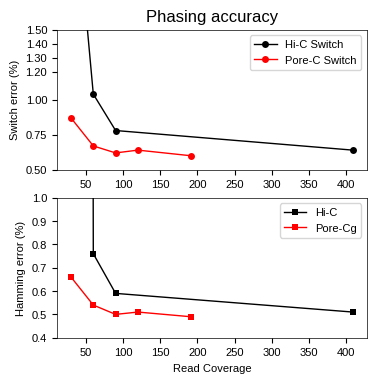

In [43]:
fig, axs = plt.subplots(2, 1, figsize=(4, 4))

# Switch error from Supplementary Tables
porec_x=[30,60,90,120,191]
porec=[0.87,0.67,0.62,0.64,0.60]
hic_x=[30,60,90,409]
hic=[2.79,1.04,0.78,0.64]

axs[0].plot(hic_x,hic,marker='.',color='k',label='Hi-C Switch', markersize=10)
axs[0].plot(porec_x,porec,marker='.',color='r',label='Pore-C Switch', markersize=10)
axs[0].set_ylabel('Switch error (%)')
axs[0].set_ylim(0.5,1.5)
axs[0].set_yticks([0.5,0.75, 1.0, 1.2, 1.3, 1.4, 1.5])
axs[0].legend(loc=1)
axs[0].set_title('Phasing accuracy')

# Hamming error from Supplementary Tables
porec=[0.66,0.54,0.50,0.51,0.49]
hic=[48.9,0.76,0.59,0.51]
#ax2 = ax1.twinx()
axs[1].plot(hic_x,hic,marker='s',color='k',label='Hi-C', markersize=5)
axs[1].plot(porec_x,porec,marker='s',color='r',label='Pore-Cg', markersize=5)
axs[1].set_ylabel('Hamming error (%)')
axs[1].set_ylim(0.4,1.0)
axs[1].set_yticks([0.4,0.5,0.6,.7,.8,.9,1])
axs[1].legend(loc=1)

axs[1].set_xlabel('Read Coverage')
axs[1].set_xticks([50,100,150,200,250,300,350,400])


fig=out_dir+'/phasing_accuracy.pdf'
plt.savefig(fig,dpi=300,bbox_inches = 'tight')

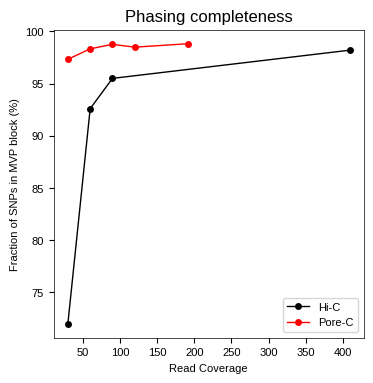

In [44]:
# % of SNPs in MVP block from Supplementary Tables
porec_x=[30,60,90,120,191]
porec=[97.33,98.33,98.76,98.49,98.82]
hic_x=[30,60,90,409]
hic=[72.0,92.6,95.5,98.2]

plt.figure(figsize=(4,4))
plt.plot(hic_x,hic,marker='.',color='k',label='Hi-C', markersize=10)
plt.plot(porec_x,porec,marker='.',color='r',label='Pore-C', markersize=10)
plt.legend()

plt.xlabel('Read Coverage')
plt.ylabel('Fraction of SNPs in MVP block (%)')
plt.xticks([50,100,150,200,250,300,350,400])
plt.title('Phasing completeness')

fig=out_dir+'/phasing_completeness.pdf'
plt.savefig(fig,dpi=300,bbox_inches = 'tight')